# MEMORIA TRABAJO VISUALIZACION DATOS

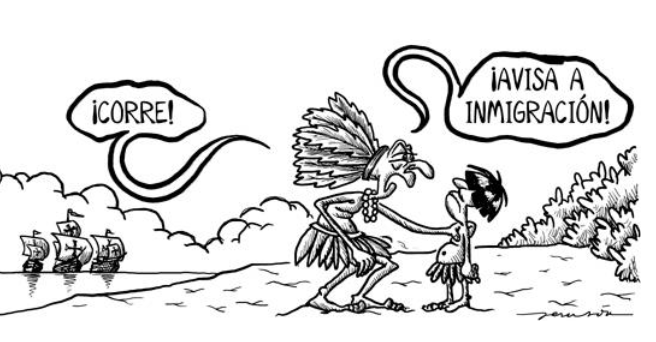

La migración se conoce como el desplazamiento de una población de un lugar a
otro que lleva consigo, un cambio de residencia habitual. Estas migraciones se
producen no solo en el entorno de los humanos, sino que también son habituales
en el reino animal. Los motivos son múltiples, pero no difieren mucho entre ambos
hábitats; los animales al igual que las personas migran por varias razones, pero
una de las principales, es la “falta de alimento”. Haciendo la extrapolación al ser
humano, esa falta de alimento se ve representada por: trabajo, posibilidades,
seguridad… y sobre todo un futuro próspero.
Uno de los principales retos a los que se enfrenta Europa en la actualidad, es la
inmigración dado que está en primer orden en todo nuestro alrededor ya sea a
nivel político con regulaciones o incluso a nivel cultural mezclando conceptos
nunca antes vistos.
Por estos y muchos más motivos, gracias a los datos que proporciona el INE, quise
adentrarme en este trabajo en el estudio de este campo. Para ello como dije
anteriormente, accedí al INE y descargué los datos correspondientes del mismo

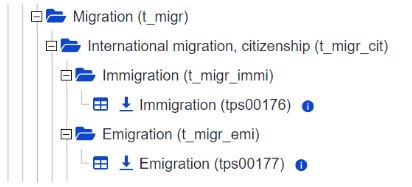

*(Ambos dataset tanto el de Inmigración como el de Emigración tuvieron que ser
tratados y preprocesados como se puede ver en el código entregado). (Todas las
imágenes expuestas en este trabajo para su mejor visibilidad están compartidas
en la carpeta “imagen_gráficos” del entregable)*

In [1]:
if (!"dplyr" %in% installed.packages()) install.packages ("dplyr")
if (!"tidyr" %in% installed.packages()) install.packages ("tidyr")
library(dplyr)
library(tidyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
setwd("/content/Datos")

df_inmigracion <- read.table("estat_tps00176.tsv", header = TRUE, sep = "\t")
df_emigracion <- read.table("estat_tps00177.tsv", header = TRUE, sep = "\t")

In [5]:
preprocesamiento_dataframe_INE <- function(df) {
  ## Modificamos la columna (freq.citizen.agedef.age.unit.sex.geo.TIME_PERIOD)
  ## Solo necesitamos las ultimas letras para saber el pais
  df$pais <- substr(df$freq.citizen.agedef.age.unit.sex.geo.TIME_PERIOD, nchar(df$freq.citizen.agedef.age.unit.sex.geo.TIME_PERIOD) - 1, nchar(df$freq.citizen.agedef.age.unit.sex.geo.TIME_PERIOD))

  #Eliminamos dicha columna y dejamos solo (Pais)
  df <- subset(df, select = -1)
  df <- df %>% select(pais, everything())

  # Limpiamos las letras sobrantes de los numeros
  df$X2011 <- gsub("[^0-9]", "", df$X2011)
  df$X2012 <- gsub("[^0-9]", "", df$X2012)
  df$X2013 <- gsub("[^0-9]", "", df$X2013)
  df$X2014 <- gsub("[^0-9]", "", df$X2014)
  df$X2015 <- gsub("[^0-9]", "", df$X2015)
  df$X2016 <- gsub("[^0-9]", "", df$X2016)
  df$X2017 <- gsub("[^0-9]", "", df$X2017)
  df$X2018 <- gsub("[^0-9]", "", df$X2018)
  df$X2019 <- gsub("[^0-9]", "", df$X2019)
  df$X2020 <- gsub("[^0-9]", "", df$X2020)
  df$X2021 <- gsub("[^0-9]", "", df$X2021)
  df$X2022 <- gsub("[^0-9]", "", df$X2022)

  #Convertimos columnas a tipo numerico
  df$X2011<- as.numeric(df$X2011)
  df$X2012<- as.numeric(df$X2012)
  df$X2013<- as.numeric(df$X2013)
  df$X2014<- as.numeric(df$X2014)
  df$X2015<- as.numeric(df$X2015)
  df$X2016<- as.numeric(df$X2016)
  df$X2017<- as.numeric(df$X2017)
  df$X2018<- as.numeric(df$X2018)
  df$X2019<- as.numeric(df$X2019)
  df$X2020<- as.numeric(df$X2020)
  df$X2021<- as.numeric(df$X2021)
  df$X2022<- as.numeric(df$X2022)

  #Remplazamos los Null por 0
  df <- replace(df, is.na(df), 0)

  #Vamos a cambiar las iniciales por el nombre completo del pais
  countries=c("BE","BG","CZ","DK","DE","EE","IE","EL","ES","FR","HR","IT","CY","LV","LT","LU","HU","MT","NL","AT","PL","PT","RO","SI","SK","FI","SE","CH","UK","LI","IS","NO","MK")
  countries_completo <- c("Bélgica", "Bulgaria", "República Checa", "Dinamarca", "Alemania", "Estonia", "Irlanda", "Grecia", "España", "Francia", "Croacia", "Italia", "Chipre", "Letonia", "Lituania", "Luxemburgo", "Hungría", "Malta", "Países Bajos", "Austria", "Polonia", "Portugal", "Rumania", "Eslovenia", "Eslovaquia", "Finlandia", "Suecia","Suiza","Reino Unido","Liechtenstein","Islandia","Noruega","Macedonia Norte")
  df_paises <- data.frame(pais = countries, country_name = countries_completo)

  # Unimos los dos dataframes para tener el nombre completo
  df <- merge(df, df_paises, by = "pais", all.x = TRUE)

  #Eliminanos filas que no nos valen
  df <- subset(df, !is.na(country_name))

  #Reorganizamos el dataframe
  df <- df %>% select(country_name, everything())

  #Dado que hay filas repetidas, las eliminamos
  df<-distinct(df)

  return(df)
}


transformar_largo <- function(df) {
  #Transformamos el df en formato largo
  df_largo <- gather(df, key = "Año", value = "Valor", -country_name, -pais)

  #Quitamos la "X" del año
  df_largo<-mutate(df_largo,Año = gsub("X", "", Año))

  # Devolver el dataframe transformado
  return(df_largo)
}

In [6]:
df_inmigracion <- preprocesamiento_dataframe_INE(df_inmigracion)
df_emigracion <- preprocesamiento_dataframe_INE(df_emigracion)

df_inmigracion_largo <- transformar_largo(df_inmigracion)
df_emigracion_largo <- transformar_largo(df_emigracion)

## Grafios

In [7]:
if (!"ggplot2" %in% installed.packages()) install.packages ("ggplot2")
if (!"scales" %in% installed.packages()) install.packages ("scales")
if (!"ggrepel" %in% installed.packages()) install.packages ("ggrepel")
if (!"gghighlight" %in% installed.packages()) install.packages ("gghighlight")
library(ggplot2)
library(scales)
library(ggrepel)
library(gghighlight)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘Rcpp’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## ¿Cómo y cuáles son los países donde la migración es más representativa?
## ¿Cómo de solapada está con la propia emigración interna del mismo?

In [9]:
paises_relevantes = c("Alemania","España","Italia","Reino Unido","Francia","Polonia")

df_inmigracion_largo <- subset(df_inmigracion_largo, country_name %in% paises_relevantes & Año < 2021)
df_emigracion_largo <- subset(df_emigracion_largo, country_name %in% paises_relevantes & Año < 2021)

color_pais <- c("Alemania"="black" ,"España" = "#AE0D12", "Italia" = "#009246","Reino Unido"="#3364B4", "Francia" = "#0055A4", "Polonia" ="yellow")

In [ ]:
options(repr.plot.width = 144, repr.plot.height = 64)

ggplot() +
  #Creamos un grafo de columnas para (Inmigracion)
  geom_col(data = df_inmigracion_largo, aes(x = Año, y = Valor, group  = country_name,color = "Inmigración"),
            fill="#00E2F0", size = 1, alpha = 1) +
  #Creamos un grafo de columnas para (Emigracion)
  geom_col (data = df_emigracion_largo, aes(x = Año, y = Valor , group = country_name, fill = "Emigración"),
            color="#EF6000", size = 1, alpha = 0.7) +
  scale_y_continuous(labels = comma) +
  labs(x = "Año", y = "Personas",
       title = "Inmigracion/Emigracinos 2011-2022 Europa",
       caption ="") +
  #Creamos un grafo de columnas para todos los paises de la Union
  facet_wrap(~ country_name)+
  scale_color_manual(values = c("Inmigración" = "#00E2F0" , "Emigración" = "#EF6000")) +
  scale_fill_manual(values = c("Emigración" = "#EF6000")) +
  theme(axis.text.x = element_text(size = 4))
+ theme_light()

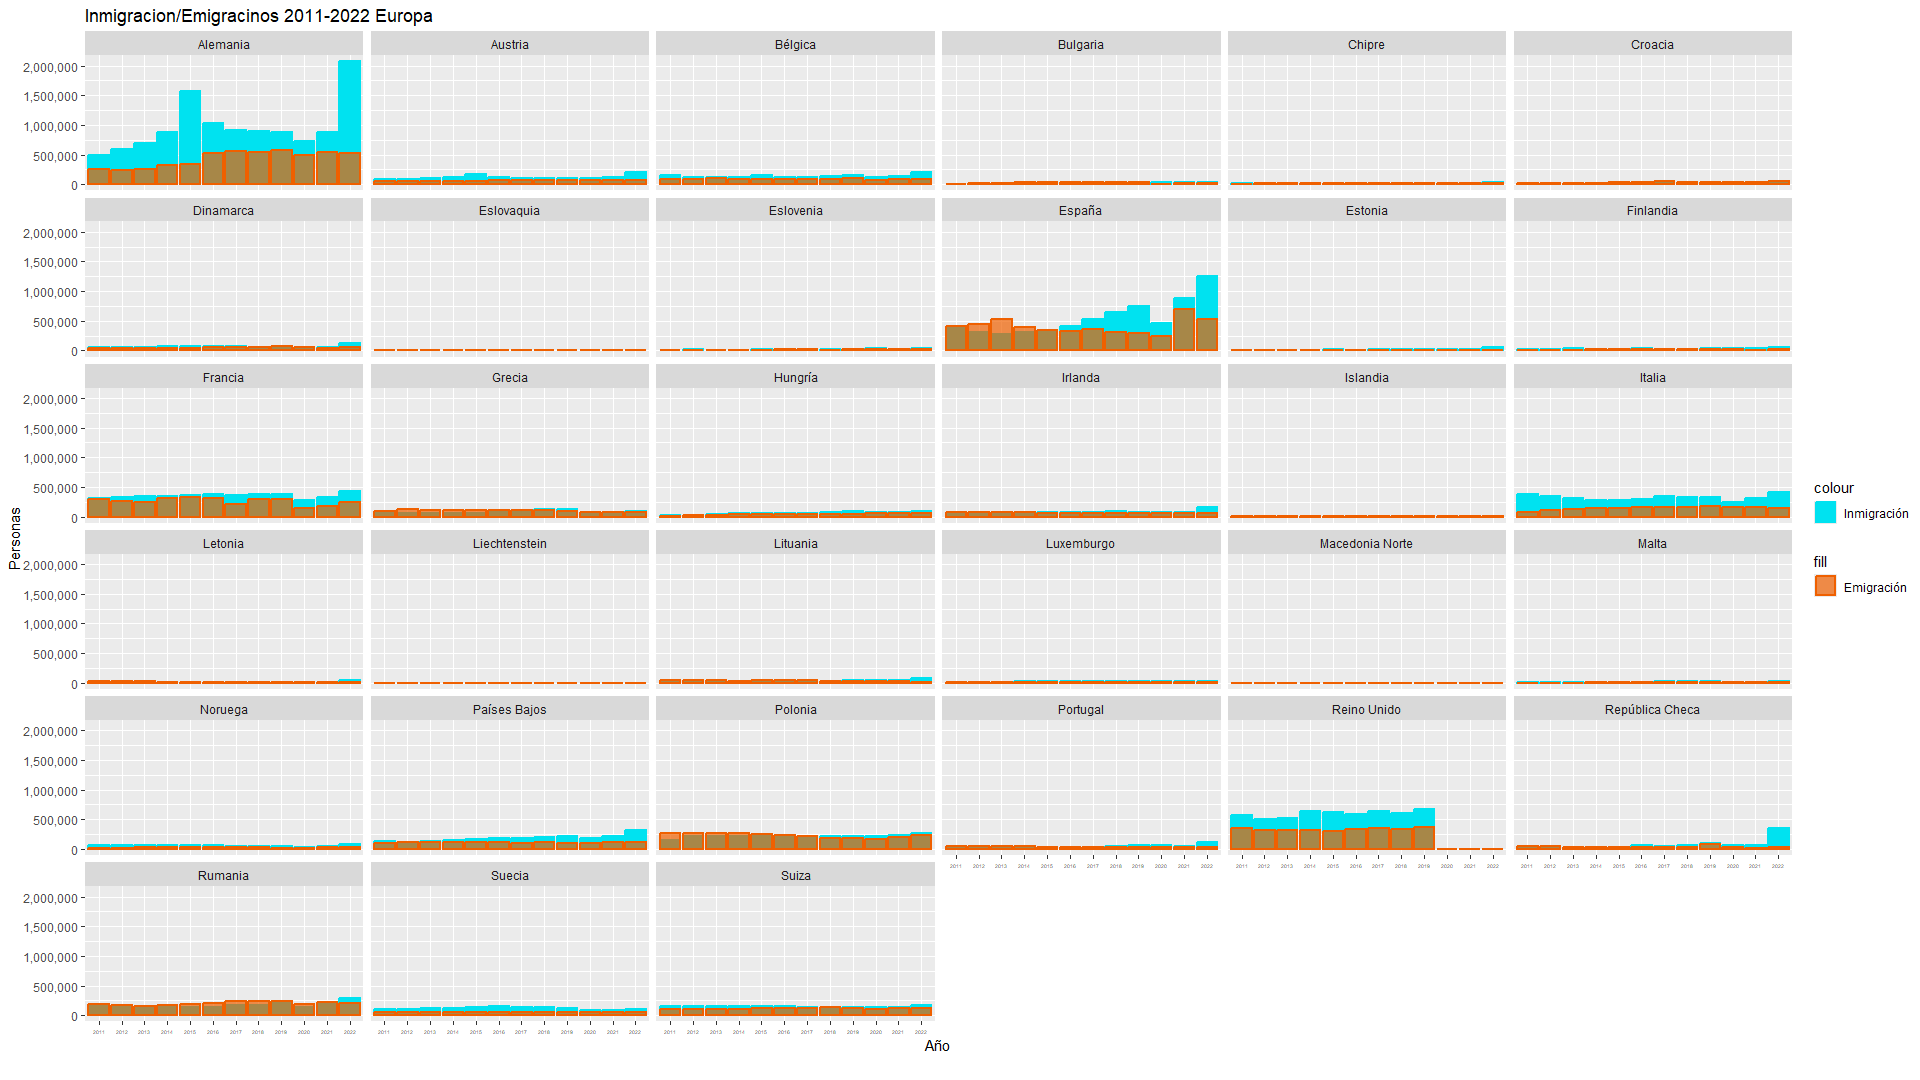


**¿Cómo y cuáles son los países donde la migración es más representativa y
cómo de solapada está con la propia emigración interna del mismo?**

Para ello realicé un multi grafo de barras donde se desglosan los diferentes países
que conforman la Unión Europea entre los años 2011 y 2022.

Como se podrá observar en el grafo, dado que son 23 países los que conforman la
Unión Europea, esto hace que podamos sacar poca información. Pero una de las
cosas que sí podemos observar son los países que se ven mayormente afectados
por la migración.


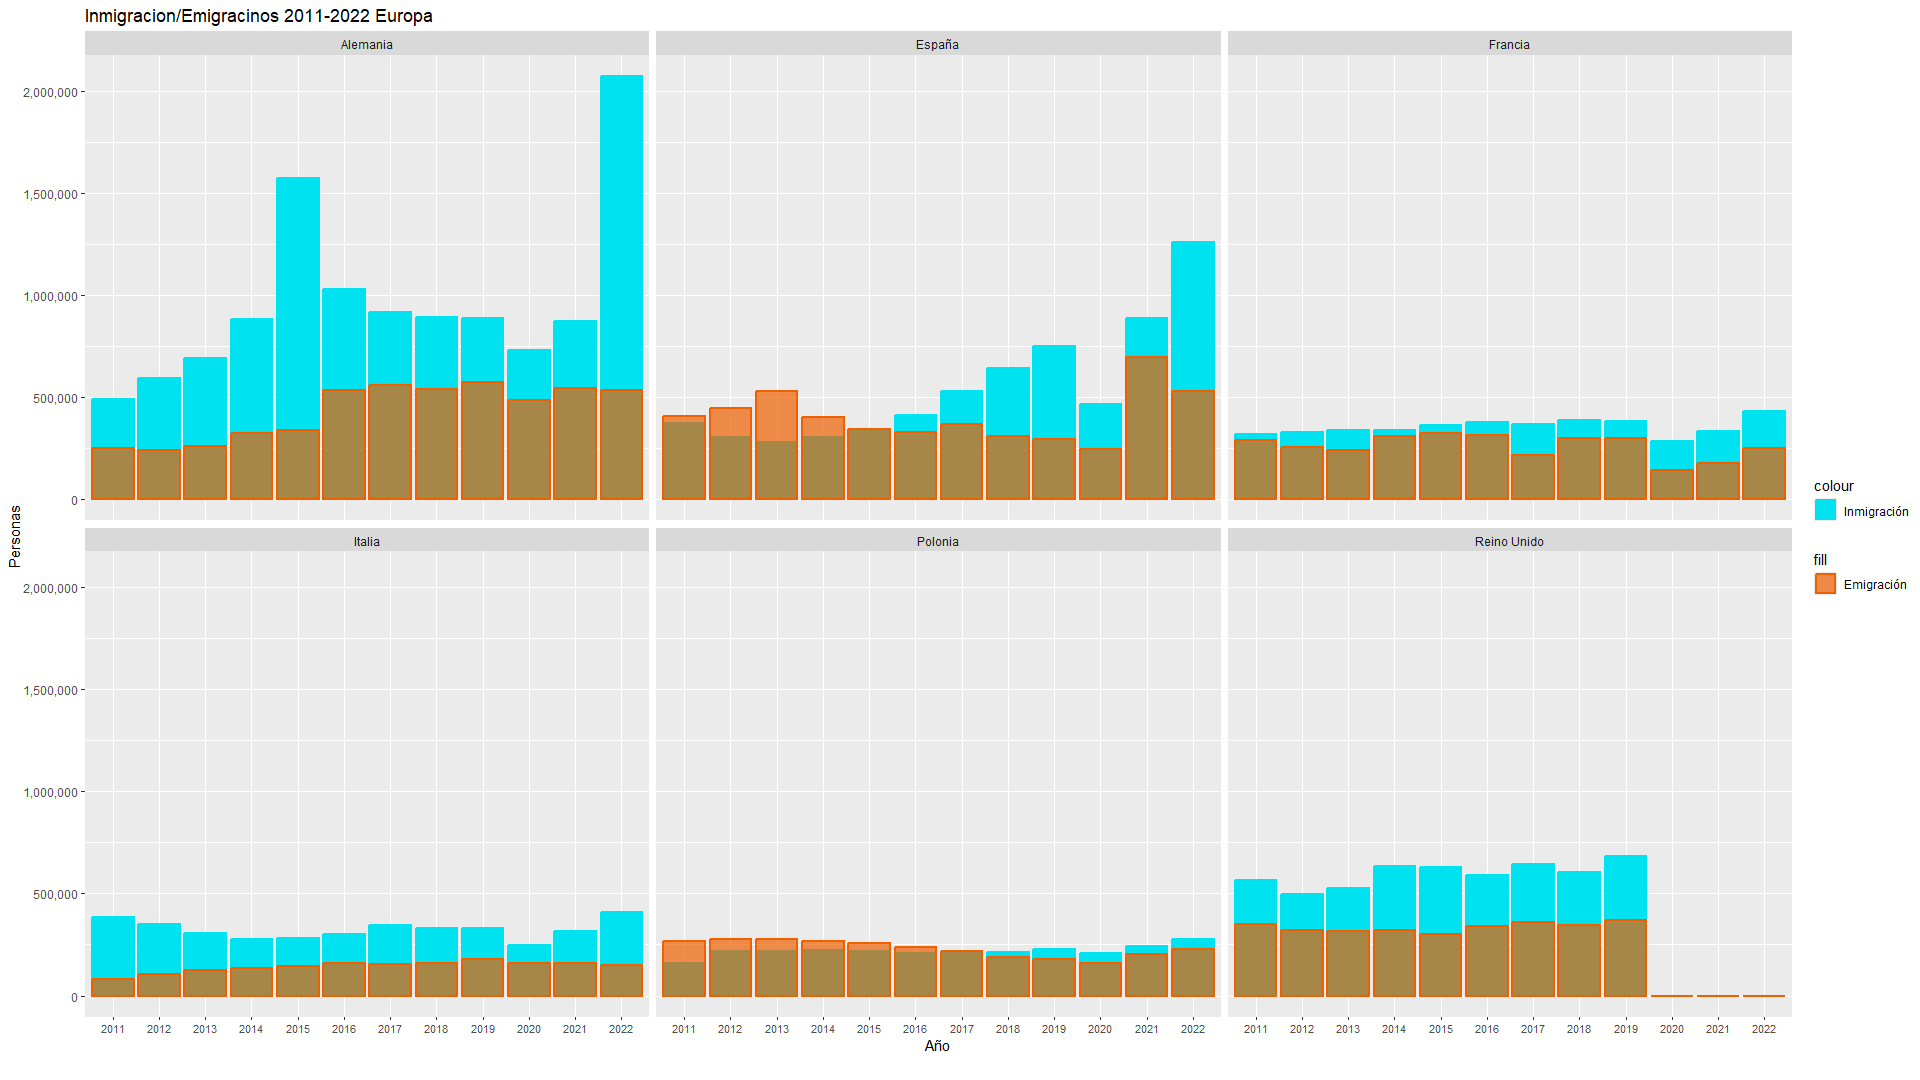

Por ello, con la misma estructura gráfica procedo a hacer un filtrado y analizar los
6 países más relevantes.

Este gráfico es mucho más esclarecedor que el anterior.

Como se puede observar, utilicé dos colores principales durante todo el trabajo: el
azul “00E2F0” y el naranja “EF6000”.

Que según la herramienta de adobe que vimos en la teoría del colores, son dos
colores análogos, idóneos para representar esta contraposición de ambos
movimientos.

Dado que quería que se viera perfectamente la diferencia entre ambos
movimientos, aunque uno de ellos solapara al anterior decidí jugar con el atributo
de la opacidad de la Emigración.

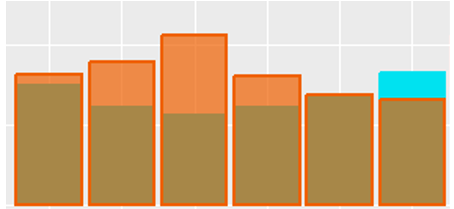



En este gráfico vemos varias cosas relevantes:


*   La cantidad de migración que sufre Alemania es muchísimo mayor que
gran parte de los países europeos teniendo dos picos en “2015”
seguramente con la acogida de refugiados sirios y “2022” de nuevo con
el inicio de la guerra en Ucrania uno de sus países vecinos. Estos picos
son de más de 1,500,000 personas en 2015 y el otro de más de
2,000,000 personas en 2022.

*   La migración de España tiene una tendencia creciente desde 2016
hasta la actualidad: siendo en la actualidad el 2º país con más
inmigrantes por año de Europa.

*   La Emigración de España desde el 2011 hasta el 2015 era incluso
mayor a su inmigración.

*   La inmigración de Reino Unido a pesar de ser uno de los países que
más ruido hizo de su inmigración llevando incluso a su conocido Brexit
en 2019, podemos apreciar como sus niveles eran altos en
comparación con otros países, pero ni mucho menos parecidos a el
caso de Alemania.

*   Por último, vemos con el resto de los países “TOP” como son: Francia,
Italia o Polonia, sus índices de migración son bastante estables a lo
largo de los años, pudiendo destacar Italia como 3º país con más
inmigración de Europa y viendo como Polonia lleva unos años de
tendencia creciente desde 2017 habiendo sido, uno de los países en
los que su población local emigraba más en el pasado. Seguramente,
acentuado ese pico en 2022 por la guerra en Ucrania




## ¿Evolución Inmigración Reino Unido antes del Brexit?

In [ ]:
paises_resaltar = c("Alemania","España","Reino Unido")
max_personas <- df_inmigracion_largo %>%
  filter(country_name %in% paises_resaltar) %>%
  group_by(country_name) %>%
  slice(which.max(Valor))

In [ ]:
ggplot() +
  #Lineas de los paises con mas migracion
  geom_line(data = df_inmigracion_largo,
            aes(x = Año, y = Valor, group = country_name,
            color = country_name)) +
  #Resaltamos los paiese con mas migracion (Alemania,España,Inglaterra)
  gghighlight(country_name %in% paises_resaltar) +
  #Ponemos Etiquetas para diferenciar cada una de las lineas
  geom_label_repel(data = max_personas, aes(x = Año, y = Valor, label = Valor),
                   hjust = -0.2, vjust = 0.5, color = "black", size = 3) +
  #Aplicamos los colores a cada uno de los pieses
  scale_color_manual(values = color_pais) +
  scale_y_continuous(labels = comma) +
  labs(x = "Año", y = "Inmigrantes",
       title = "Evolución de la Inmigracion",
       caption = "INE")+ theme_minimal()

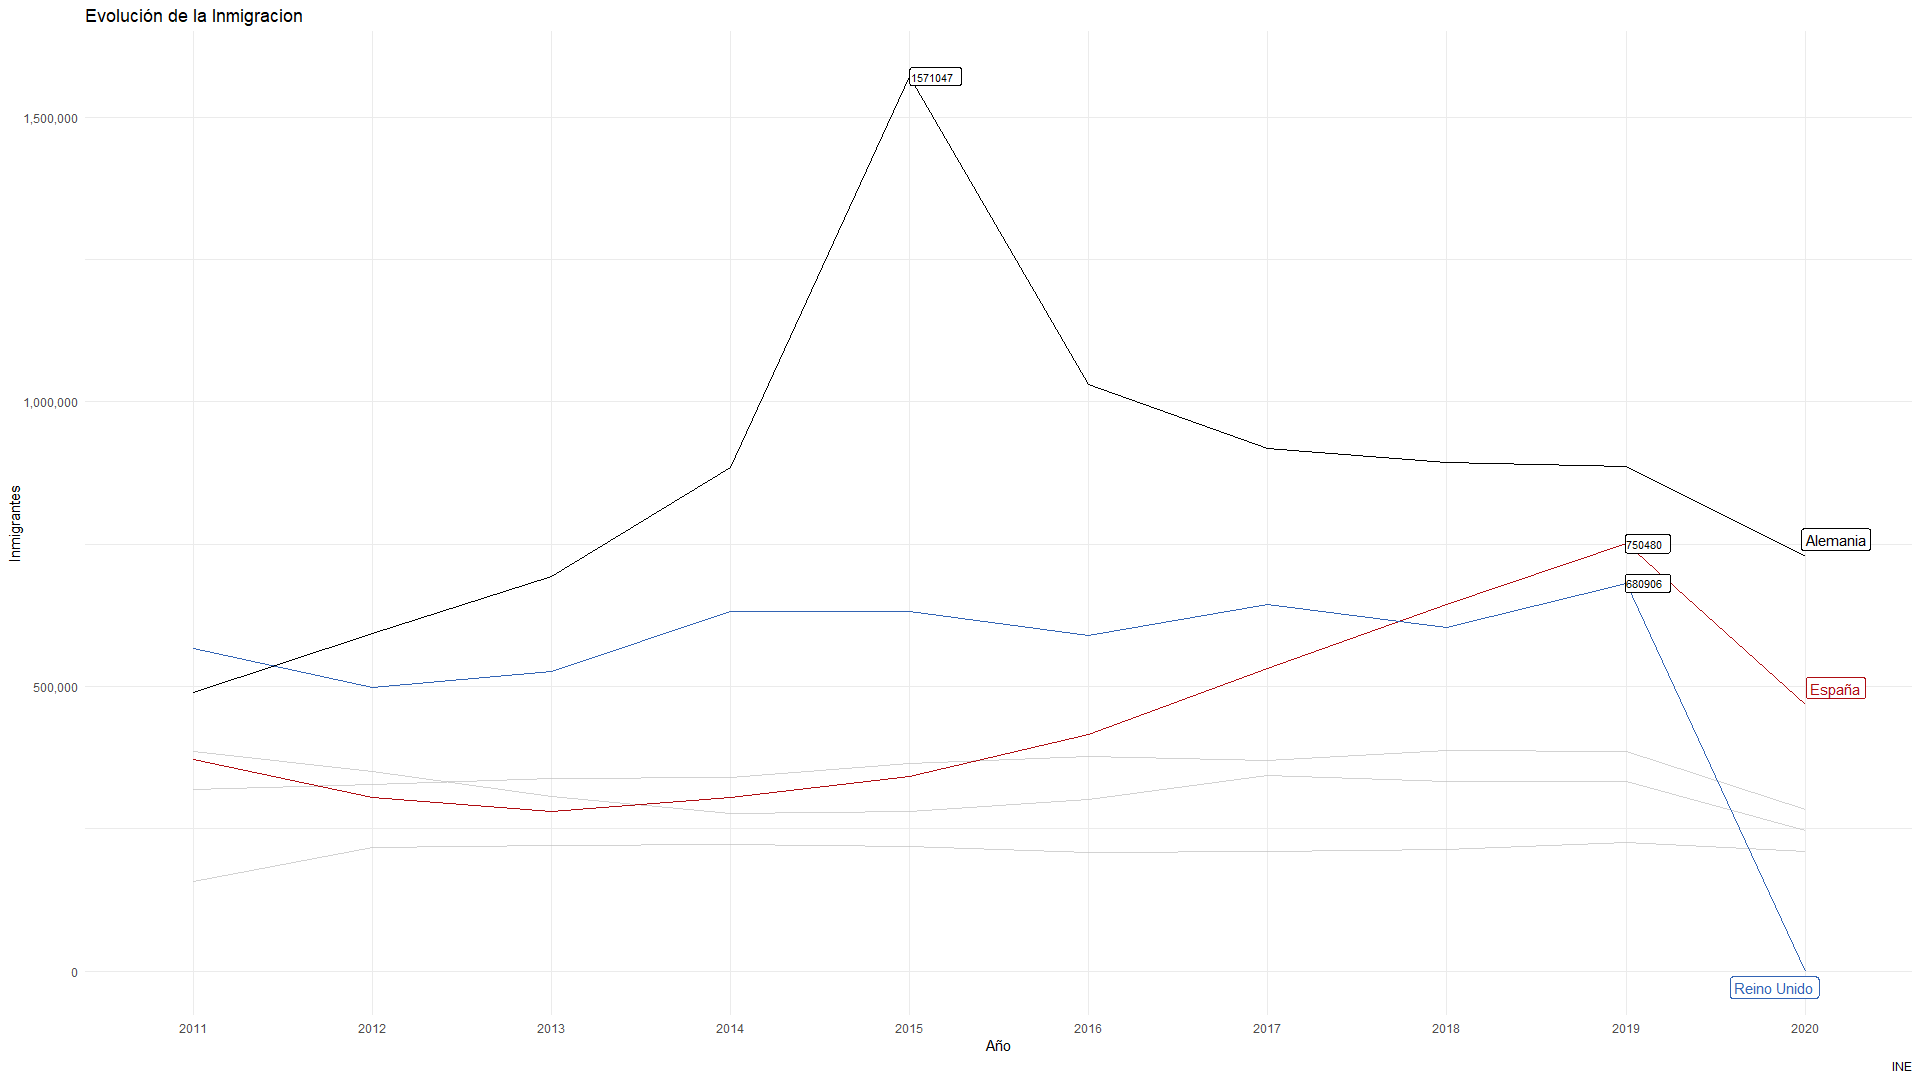

El segundo grafico que realice fue el que mas dolores de cabeza me dio.

La principal idea que tenia en mente era realizar un grafico lineal con los
anteriores países mas representativos cada uno con su color de bandera
representando su línea, y mostrando linealmente la diferencia del “Top 3”
respecto del resto.

**Sobre todo, quise enfatizar en Reino Unido para ver como de notoria era su
inmigración para ser un desencadenante del Brexit**

Finalmente hice varias pruebas y ninguno me convencía especialmente.

Por lo que me decante en usar el objeto gghighlight que vimos en clase para
acentuar los “Top 3” y poner en un segundo puesto al resto.

Utilice “geom_text” para representar el nombre de los países y sus picos de más
migración.



*   Como podemos ver Reino Unido a lo largo
de los años se mantiene como el 2º país con
mayor inmigración de Europa, pero de nuevo
vemos como su migración parece
insignificante mirándola respecto la de
Alemania, destacando un pico de 680,906
personas en 2019 antes de su salida. Aun
así, siendo superada por España por más de 80.000 personas de diferencia.




## APLICACION SHINY

In [ ]:
#
# This is a Shiny web application. You can run the application by clicking
# the 'Run App' button above.
#
# Find out more about building applications with Shiny here:
#
#    http://shiny.rstudio.com/
#
if (!"dplyr" %in% installed.packages()) install.packages ("dplyr")
if (!"tidyr" %in% installed.packages()) install.packages ("tidyr")
if (!"ggplot2" %in% installed.packages()) install.packages ("ggplot2")
if (!"scales" %in% installed.packages()) install.packages ("scales")
if (!"ggrepel" %in% installed.packages()) install.packages ("ggrepel")
if (!"gghighlight" %in% installed.packages()) install.packages ("gghighlight")
if (!"DT" %in% installed.packages()) install.packages ("DT")
library(shiny)
library(ggplot2)
library(scales)
library(ggrepel)
library(gghighlight)
library(dplyr)
library(tidyr)
library(DT)

setwd("C:/Users/anton/OneDrive/Documentos/ANO 4º/Visualizacion_Datos/practica_r")
df_total <- read.csv2("df_shiny.csv")


ui <- fluidPage(
  titlePanel("Migracion Europa"),
  sidebarLayout(
    sidebarPanel(
      sliderInput("año_selected",
                  "Selecciona Año:",
                  min = 2011,
                  max = 2022,
                  value = 2015),
      downloadButton("descargar", "Descargar Datos", position = "left")
    ),
    mainPanel(
      tabsetPanel(
        tabPanel("Tabla",tableOutput("table")),
        tabPanel("Grafico",
                 plotOutput("distPlot")),
        h3("Selecciona Paises para eliminarlos de la comparacion"),
        fluidRow(
          column(4,
                 checkboxInput("btn_Suiza", "Suiza", value = FALSE),
                 checkboxInput("btn_Suecia", "Suecia", value = FALSE),
                 checkboxInput("btn_Rumania", "Rumania", value = FALSE),
                 checkboxInput("btn_Replublica", "Replública Checa", value = FALSE),
                 checkboxInput("btn_Reino_Unido", "Reino Unido", value = FALSE),
                 checkboxInput("btn_Portugal", "Portugal", value = FALSE),
                 checkboxInput("btn_Polonia", "Polonia", value = FALSE),
                 checkboxInput("btn_Finlandia", "Finlandia", value = FALSE),
                 checkboxInput("btn_Eslovaquia", "Eslovaquia", value = FALSE),
                 checkboxInput("btn_Chipre", "Chipre", value = FALSE),
                 checkboxInput("btn_Austria", "Austria", value = FALSE)
          ),
          column(4,
                 checkboxInput("btn_Paises_Bajos", "Paises Bajos", value = FALSE),
                 checkboxInput("btn_Noruega", "Noruega", value = FALSE),
                 checkboxInput("btn_Malta", "Malta", value = FALSE),
                 checkboxInput("btn_Macedonia_Norte", "Macedonia Norte", value = FALSE),
                 checkboxInput("btn_Luxemburgo", "Luxemburgo", value = FALSE),
                 checkboxInput("btn_Lituania", "Lituania", value = FALSE),
                 checkboxInput("btn_Liechtenstein", "Liechtenstein", value = FALSE),
                 checkboxInput("btn_Estonia", "Estonia", value = FALSE),
                 checkboxInput("btn_Dinamarca", "Dinamarca", value = FALSE),
                 checkboxInput("btn_Bulgaria", "Bulgaria", value = FALSE),
                 checkboxInput("btn_Alemania", "Alemania", value = FALSE)
          ),
          column(4,
                 checkboxInput("btn_Letonia", "Letonia", value = FALSE),
                 checkboxInput("btn_Italia", "Italia", value = FALSE),
                 checkboxInput("btn_Islandia", "Islandia", value = FALSE),
                 checkboxInput("btn_Irlanda", "Irlanda", value = FALSE),
                 checkboxInput("btn_Hungria", "Hungria", value = FALSE),
                 checkboxInput("btn_Grecia", "Grecia", value = FALSE),
                 checkboxInput("btn_Francia", "Francia", value = FALSE),
                 checkboxInput("btn_España", "España", value = FALSE),
                 checkboxInput("btn_Croacia", "Croacia", value = FALSE),
                 checkboxInput("btn_Eslovenia", "Eslovenia", value = FALSE)
          )
        )

      )

    )
  )
)


server <- function(input, output,session) {
    #Metodo para mostrar la tabla con los datos
    output$table <- renderDataTable({
      df_total
    })

    output$distPlot <- renderPlot({
      #Lista donde almacenaremos los paises que el usuario no quiera ver
      paises_seleccionados <- list()
      if (input$btn_Suiza) paises_seleccionados <- c(paises_seleccionados, "Suiza")
      if (input$btn_Suecia) paises_seleccionados <- c(paises_seleccionados, "Suecia")
      if (input$btn_Rumania) paises_seleccionados <- c(paises_seleccionados, "Rumania")
      if (input$btn_Replublica) paises_seleccionados <- c(paises_seleccionados, "República Checa")
      if (input$btn_Reino_Unido) paises_seleccionados <- c(paises_seleccionados, "Reino Unido")
      if (input$btn_Portugal) paises_seleccionados <- c(paises_seleccionados, "Portugal")
      if (input$btn_Polonia) paises_seleccionados <- c(paises_seleccionados, "Polonia")
      if (input$btn_Finlandia) paises_seleccionados <- c(paises_seleccionados, "Finlandia")
      if (input$btn_Eslovaquia) paises_seleccionados <- c(paises_seleccionados, "Eslovaquia")
      if (input$btn_Chipre) paises_seleccionados <- c(paises_seleccionados, "Chipre")
      if (input$btn_Austria) paises_seleccionados <- c(paises_seleccionados, "Austria")

      if (input$btn_Paises_Bajos) paises_seleccionados <- c(paises_seleccionados, "Países Bajos")
      if (input$btn_Noruega) paises_seleccionados <- c(paises_seleccionados, "Noruega")
      if (input$btn_Malta) paises_seleccionados <- c(paises_seleccionados, "Malta")
      if (input$btn_Macedonia_Norte) paises_seleccionados <- c(paises_seleccionados, "Macedonia Norte")
      if (input$btn_Luxemburgo) paises_seleccionados <- c(paises_seleccionados, "Luxemburgo")
      if (input$btn_Lituania) paises_seleccionados <- c(paises_seleccionados, "Lituania")
      if (input$btn_Liechtenstein) paises_seleccionados <- c(paises_seleccionados, "Liechtenstein")
      if (input$btn_Estonia) paises_seleccionados <- c(paises_seleccionados, "Estonia")
      if (input$btn_Dinamarca) paises_seleccionados <- c(paises_seleccionados, "Dinamarca")
      if (input$btn_Bulgaria) paises_seleccionados <- c(paises_seleccionados, "Bulgaria")
      if (input$btn_Alemania) paises_seleccionados <- c(paises_seleccionados, "Alemania")

      if (input$btn_Letonia) paises_seleccionados <- c(paises_seleccionados, "Letonia")
      if (input$btn_Italia) paises_seleccionados <- c(paises_seleccionados, "Italia")
      if (input$btn_Islandia) paises_seleccionados <- c(paises_seleccionados, "Islandia")
      if (input$btn_Irlanda) paises_seleccionados <- c(paises_seleccionados, "Irlanda")
      if (input$btn_Hungria) paises_seleccionados <- c(paises_seleccionados, "Hungría")
      if (input$btn_Grecia) paises_seleccionados <- c(paises_seleccionados, "Grecia")
      if (input$btn_Francia) paises_seleccionados <- c(paises_seleccionados, "Francia")
      if (input$btn_España) paises_seleccionados <- c(paises_seleccionados, "España")
      if (input$btn_Croacia) paises_seleccionados <- c(paises_seleccionados, "Croacia")

      for (elemento in paises_seleccionados) {
        cat(elemento, "\n")
      }
      print("--------------------------------")

      # Metemos direcatamente en el grafo el df con las condiciones que el usuario quiera
      ggplot(data = filter(df_total, Año == input$año_selected) %>%
               arrange(desc(Inmigracion)) %>%
               filter(!(country_name.x %in% paises_seleccionados)),
             aes(x = country_name.x)) +
        #Creamos un grafo de barras con el texto de la cantidad de inmigrantes para que sea mas legible
        geom_bar(aes(y = Inmigracion, fill = "Inmigracion"), stat = "identity", width = 0.5, position = "dodge", color="#00E2F0") +
        geom_text(aes(y = Inmigracion, label = Inmigracion), vjust = 0, size = 3, color = "black", nudge_y = 50) +
        #Creamos un grafo de barras con el texto de la cantidad de emigrantes para que sea mas legible
        geom_bar(aes(y = -Emigracion, fill = "Emigracion"), stat = "identity", width = 0.5, position = "dodge",color="#EF6000") +
        geom_text(aes(y = -Emigracion, label = Emigracion), vjust = 0, size = 3, color = "black",nudge_y = 50) +
        # Cambiamos la escala de de la y dado que son numeros muy grandes
        scale_y_continuous(labels = comma) +
        labs(title = "Migracion Europa", x = "Mes", y = "Cantidad Personas", fill = "Colores") +
        #Rotamos el grafo para que se vea de forma vertical como una piramide poblacional
        coord_flip()+
        theme_minimal()
    })

    #Metodo para descargar el csv
    output$descargar <- downloadHandler(
      filename = function() {
        "inmigracion_emigracion_europa.csv"
      },
      content = function(file) {
        write.csv(df_total,
                  file, row.names = FALSE)
      })
}

# Run the application
shinyApp(ui = ui, server = server)

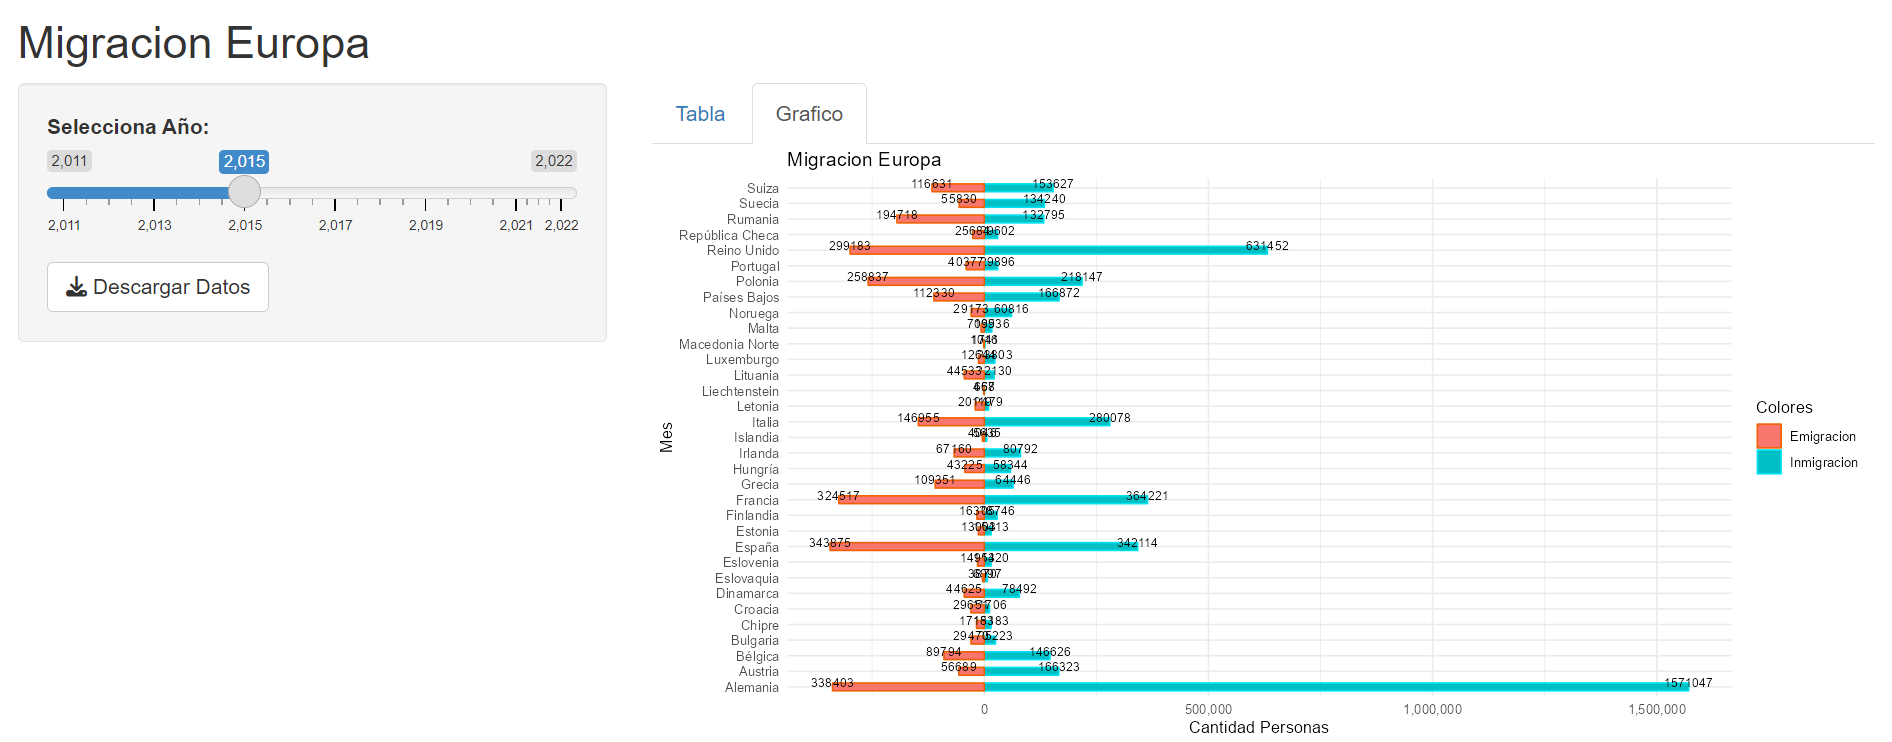
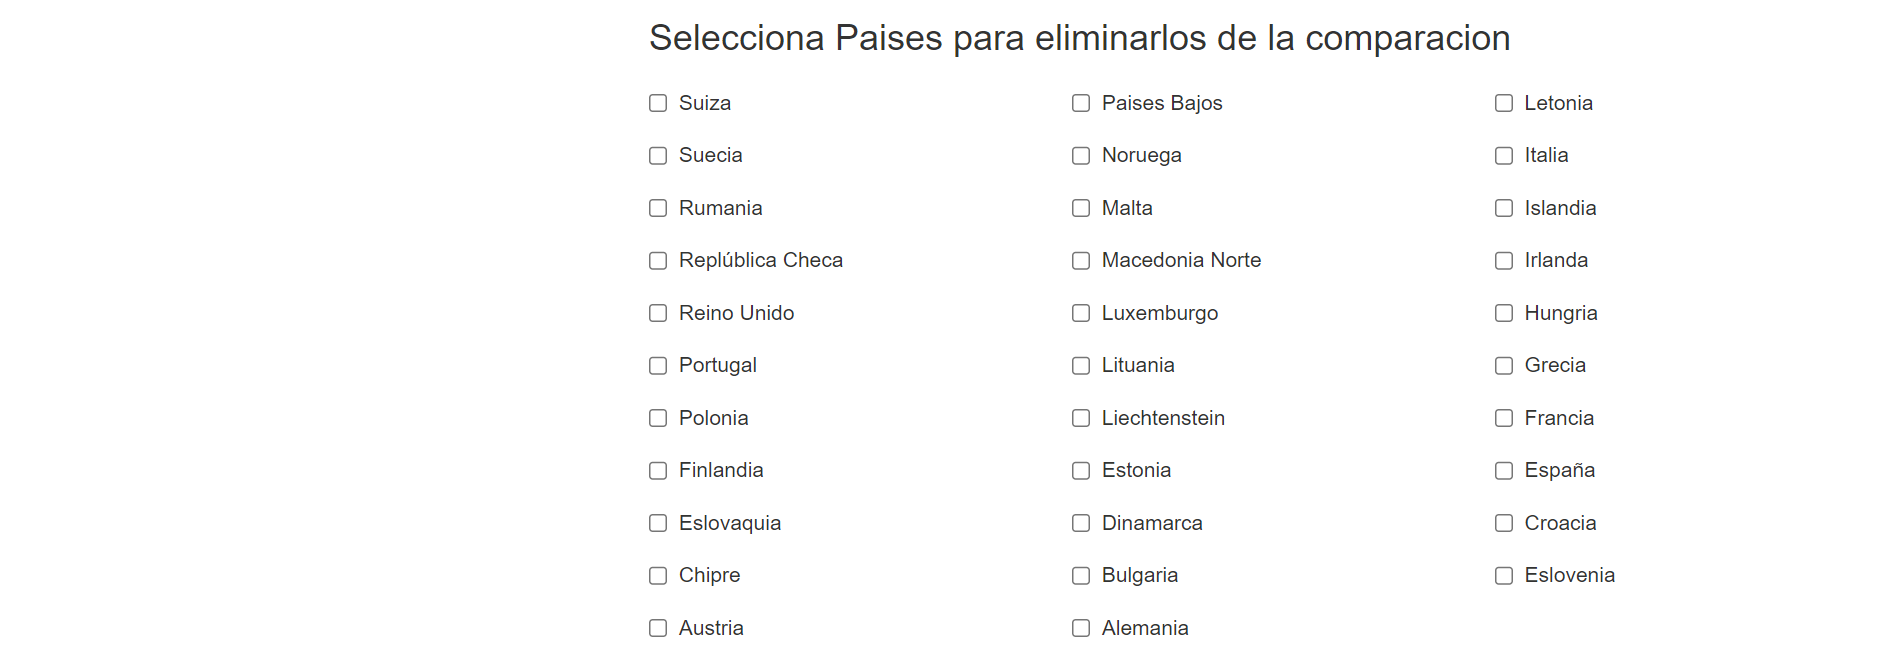

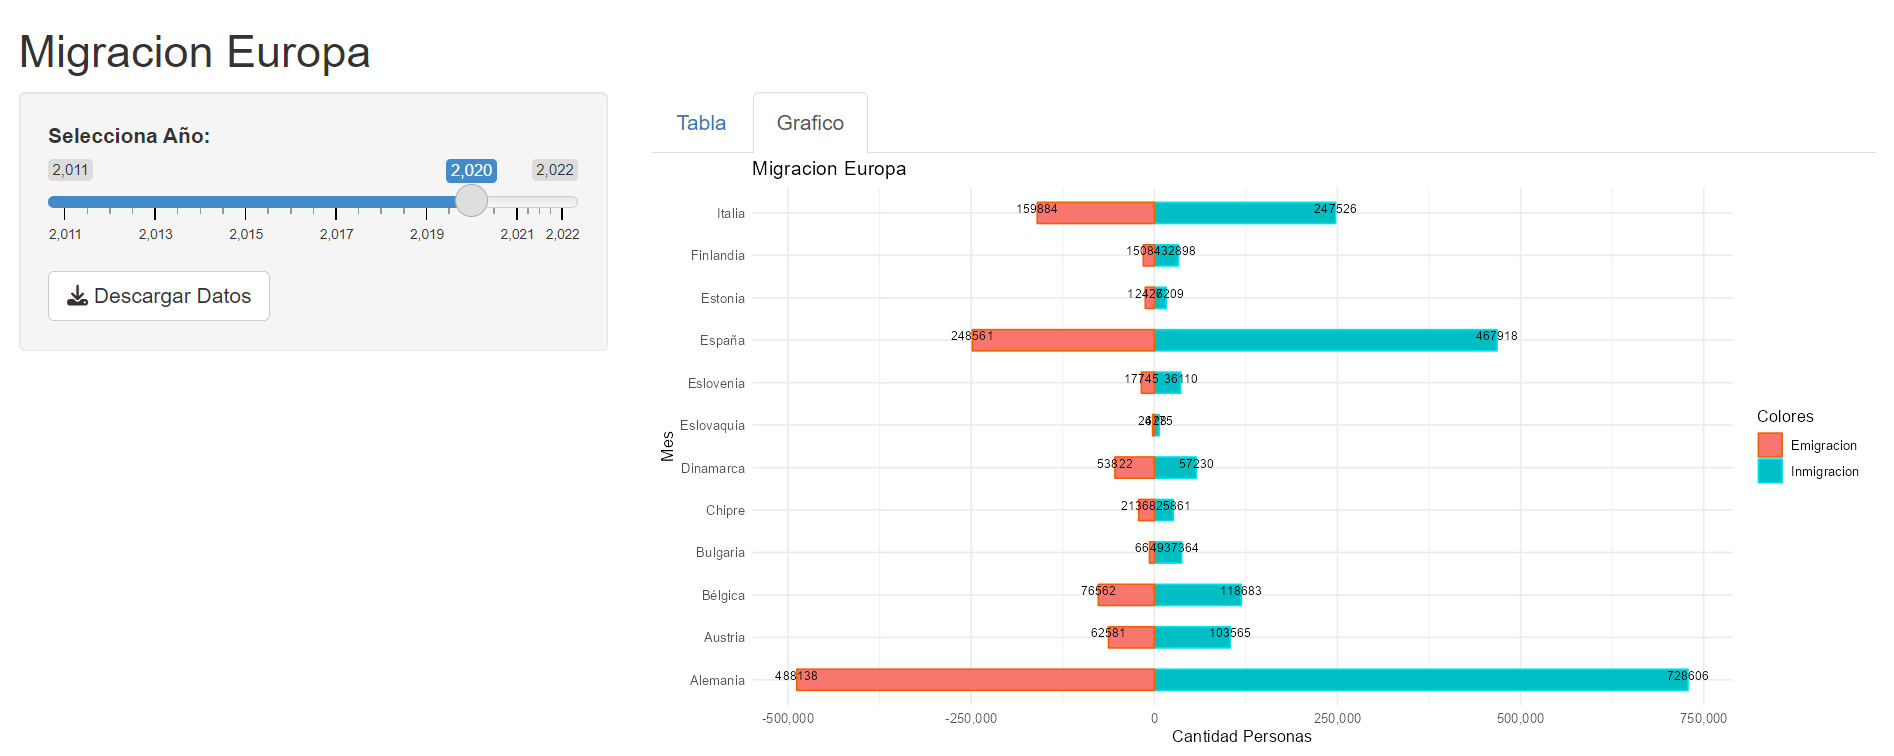
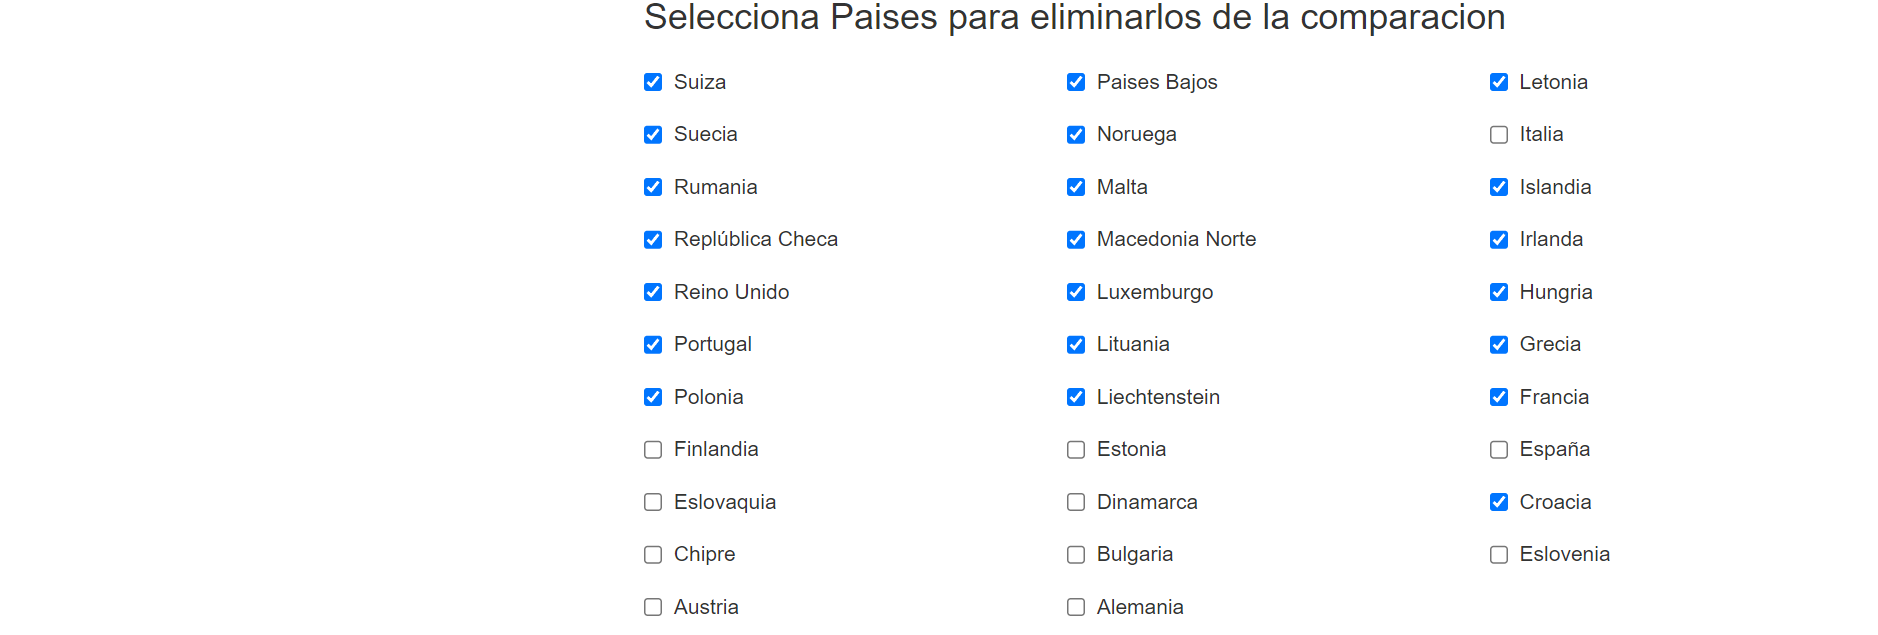